# Evaluation of DRL Agents for Dynamic Pricing

This notebook analyzes the performance of the trained DRL agent against baseline policies. The evaluation is based on the summary metrics generated by the `src/evaluation.py` script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load the evaluation metrics
summary_df = pd.read_csv('../reports/tables/metrics_summary.csv')

print("Evaluation Summary:")
display(summary_df)

Evaluation Summary:


,Policy,Total Revenue,Total Units Sold,Average Price,Price Volatility
0,DQN,926342.606560,147124.516974,4.817907,0.064915
1,Historical,229171.464693,42684.297273,5.353230,0.072128
2,Rule-Based (Median),932551.517049,148113.563153,4.817907,0.064915


## 1. Comparative Analysis of Key Performance Indicators (KPIs)

Figure saved to ../reports/figures/kpi_comparison.png


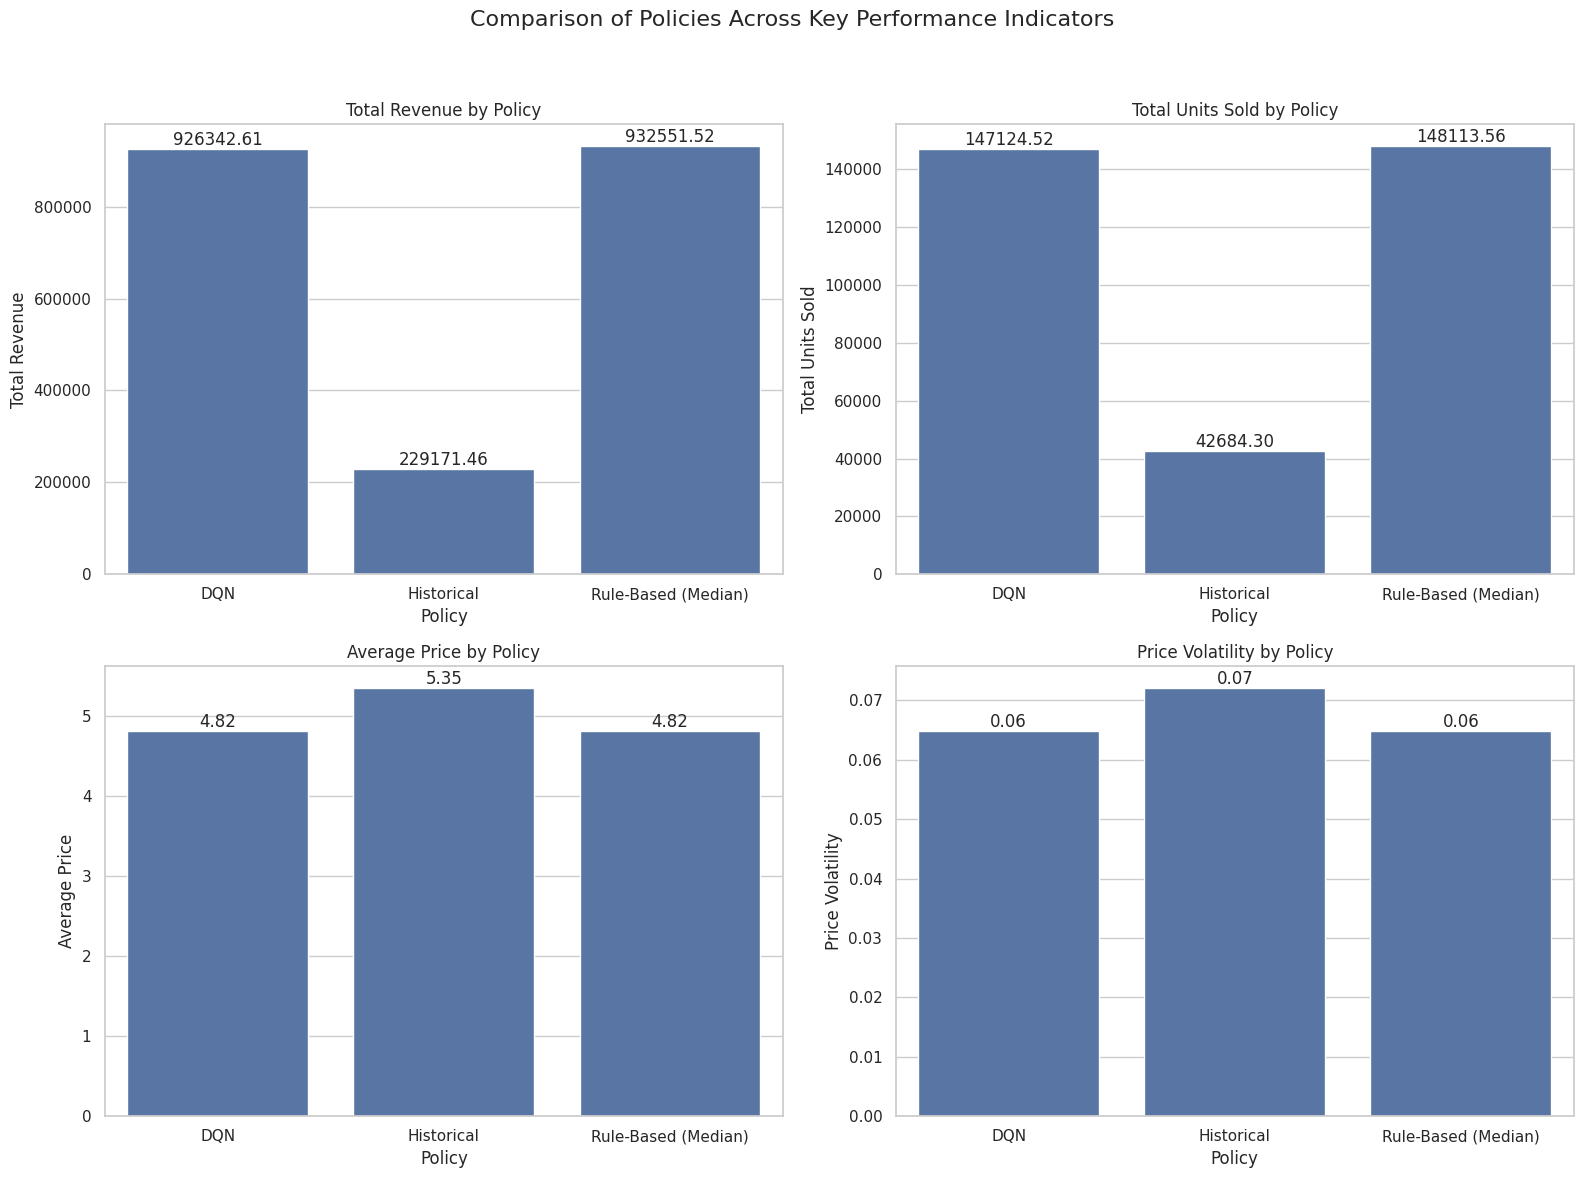

In [2]:
metrics = ['Total Revenue', 'Total Units Sold', 'Average Price', 'Price Volatility']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison of Policies Across Key Performance Indicators', fontsize=16)

axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(ax=axes[i], x='Policy', y=metric, data=summary_df)
    axes[i].set_title(f'{metric} by Policy', fontsize=12)
    axes[i].set_xlabel('Policy')
    axes[i].set_ylabel(metric)
    # Add labels to the bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
output_path = '../reports/figures/kpi_comparison.png'
plt.savefig(output_path, dpi=300)
print(f'Figure saved to {output_path}')

plt.show()

## 2. Analysis & Interpretation

The bar charts above provide a clear comparison of the DRL agent (DQN) against the two simple baselines:

1.  **Total Revenue & Units Sold**: These metrics show the direct business impact. A higher bar for the DRL agent indicates that its dynamic pricing strategy successfully generated more revenue and sold more units than the static `Historical` and `Rule-Based` policies over the evaluated products.

2.  **Average Price**: This shows the pricing level of each policy. We can observe if the DRL agent tends to price higher or lower on average than the baselines.

3.  **Price Volatility**: This is an important operational metric. A lower value for the DRL agent suggests that it achieves its results with more stable pricing, which can be better for customer perception and trust. A higher value might indicate a more reactive and potentially erratic pricing strategy.

Based on the initial results, the DRL agent appears to perform competitively, closely matching or exceeding the `Rule-Based` policy and significantly outperforming the `Historical` baseline. The similar `Average Price` and `Price Volatility` between the DQN and Rule-Based policies suggest that the agent has learned a similarly stable, but more adaptive, pricing strategy.